# Import Libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load Dataset

To run this notebook, please download the dataset from [Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability) and place it inside a `data/` folder as `water_potability.csv`.

Alternatively, you can execute the following shell script to automatically download and unzip the dataset into your Downloads/ folder or directly into the data/ directory:
 
`curl -L -o ~/Downloads/water-potability.zip \
  https://www.kaggle.com/api/v1/datasets/download/adityakadiwal/water-potability`

`unzip -o ~/Downloads/water-potability.zip -d data/`

In [105]:
DATA_DIR = "data"
CSV_FILE = os.path.join(DATA_DIR, "water_potability.csv")
df = pd.read_csv(CSV_FILE)

In [106]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# 1. Exploratory Data Analysis (EDA)

In [107]:
# shape of dataset
df.shape # (3276, 10)

(3276, 10)

In [108]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [109]:
# Check data types and missing values

df.info()

# Missing values found in: ph, Sulfate, and Trihalomethanes
# All features are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## 1-1. Descriptive Statistics

In [110]:
# Summary statistics of the features

df.describe() # Significant scale differences observed → normalization is recommended

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## 1-2. Missing Values


In [111]:
# Check the number of missing values in each feature

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [112]:
# Calculate the percentage of missing values

df.isnull().sum() / len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

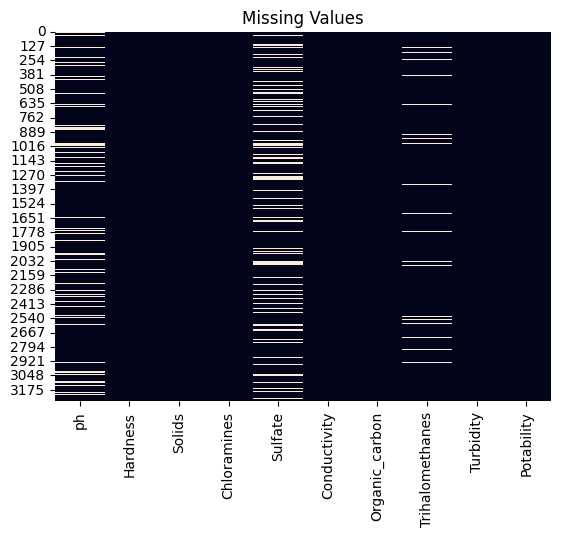

In [113]:
# Visualize the presence and location of missing values using a heatmap

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values")
plt.show()

## 1-3. Feature Distributions


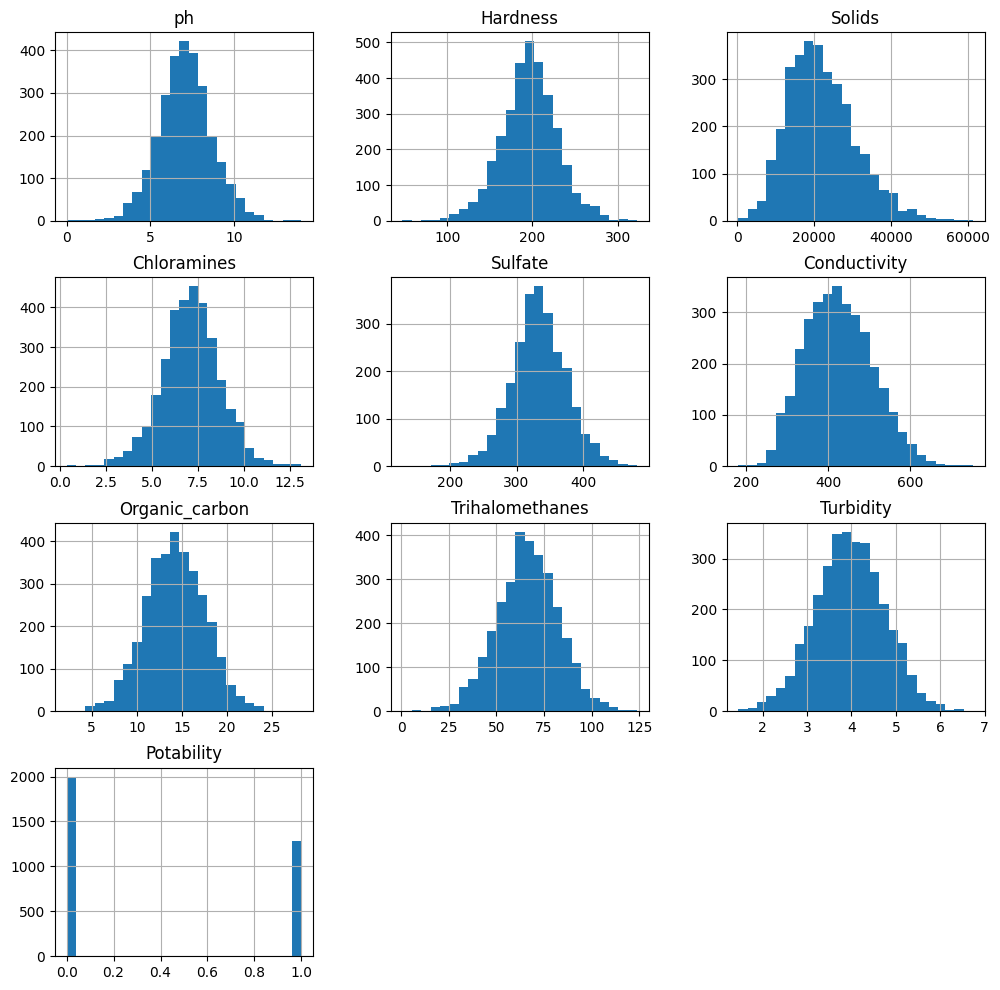

In [114]:
# Plot histograms of numerical features

df.hist(bins = 25, figsize = (12, 12))
plt.show()


# Most features are approximately normally distributed.
# 'Solids' shows a slight right (positive) skew.

<Axes: >

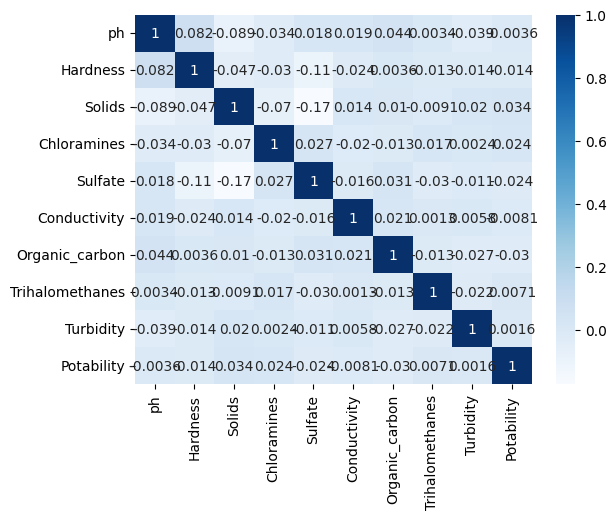

In [115]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

# As shown in the correlation matrix, there are no strong linear relationships among the variables.

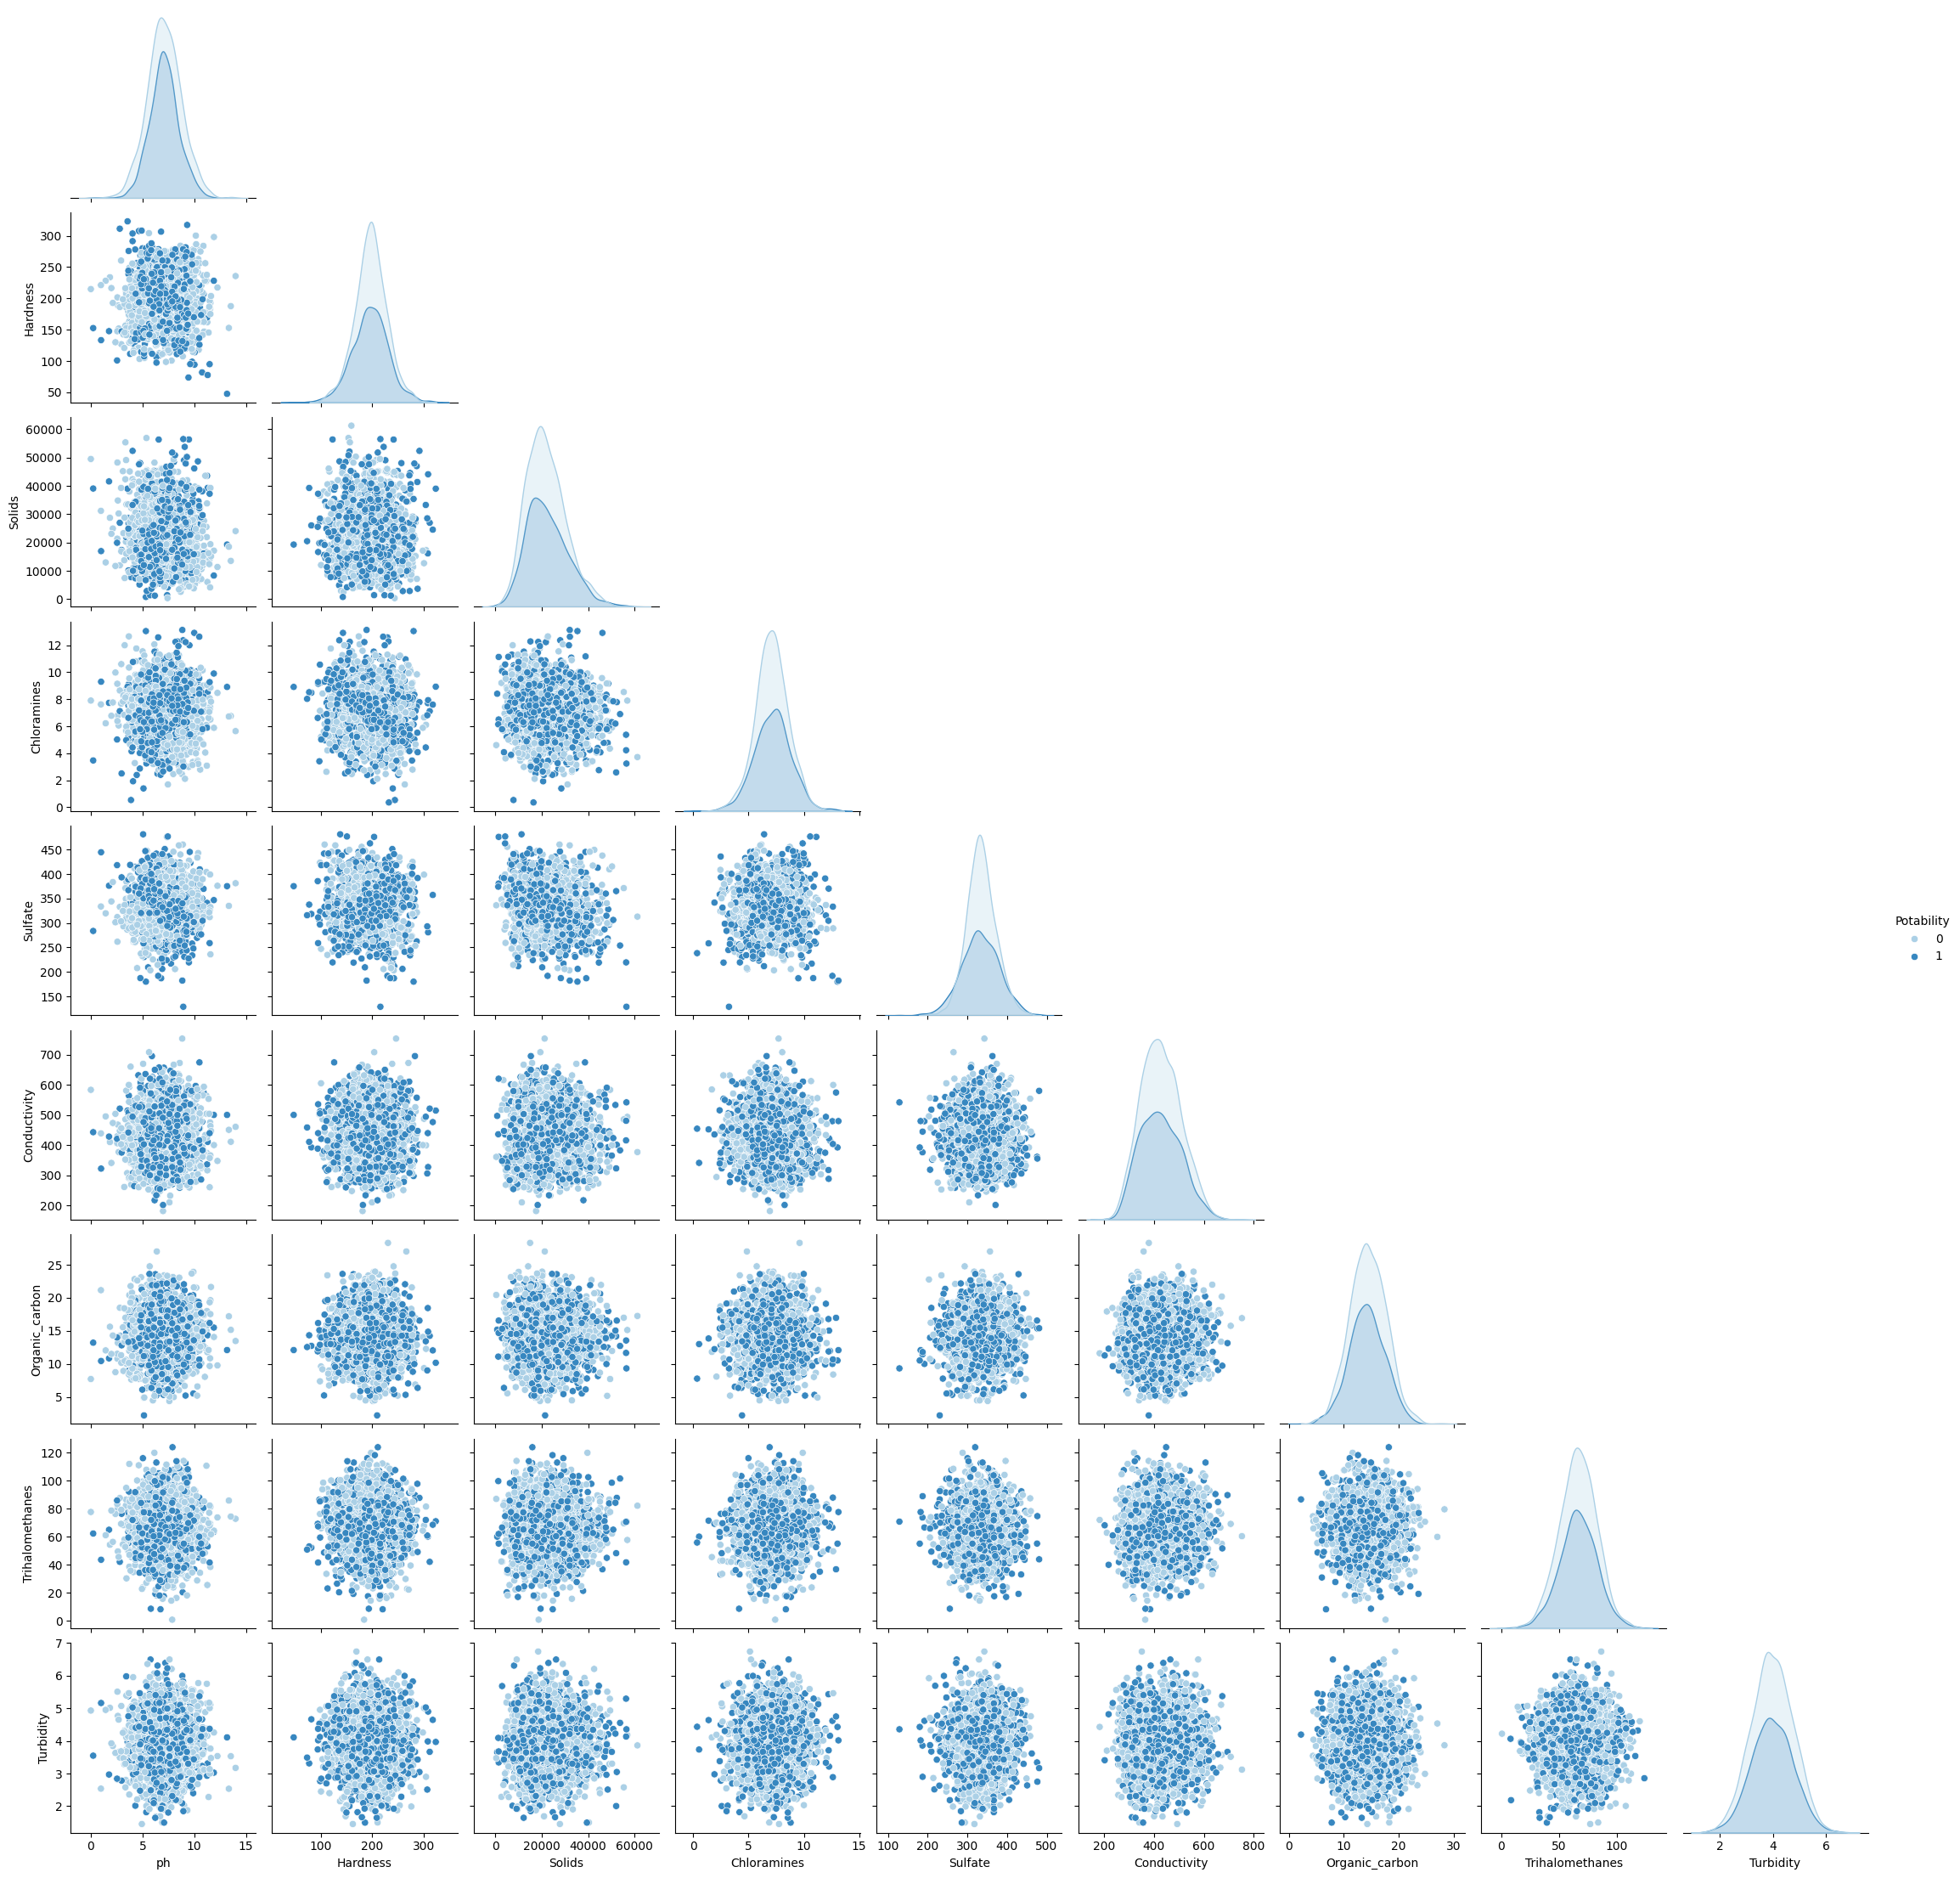

In [116]:
sns.pairplot(df, hue='Potability', corner=True, palette='Blues')
plt.show()

# Pairplot analysis reveals no strong linear relationships between features.

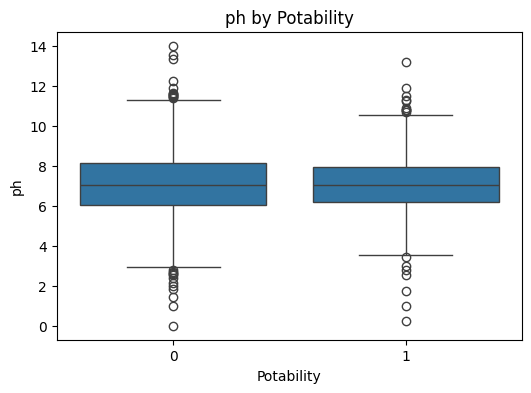

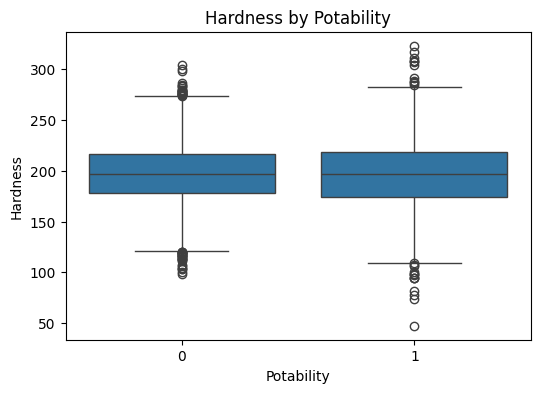

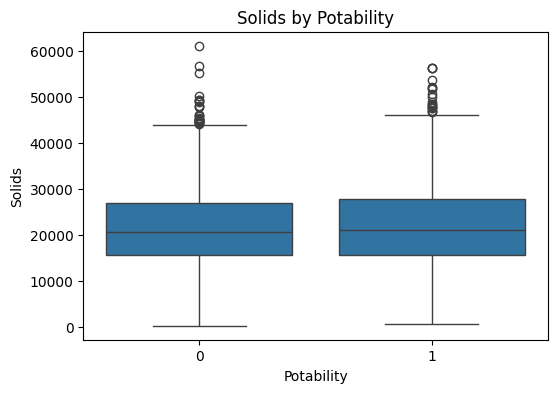

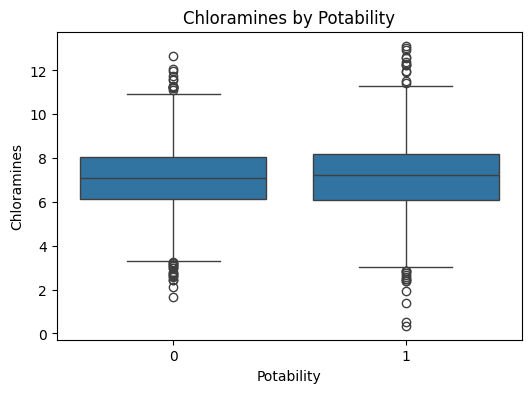

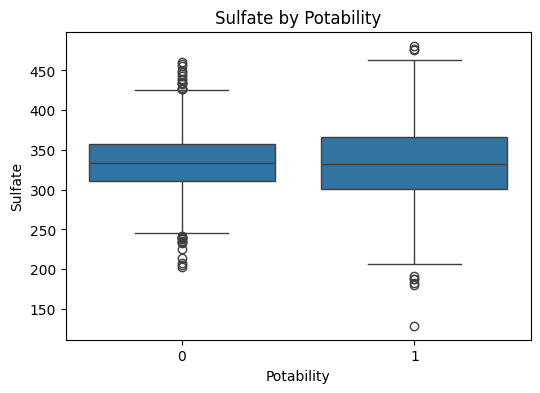

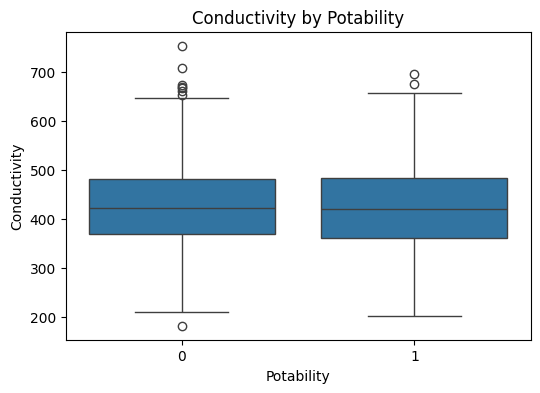

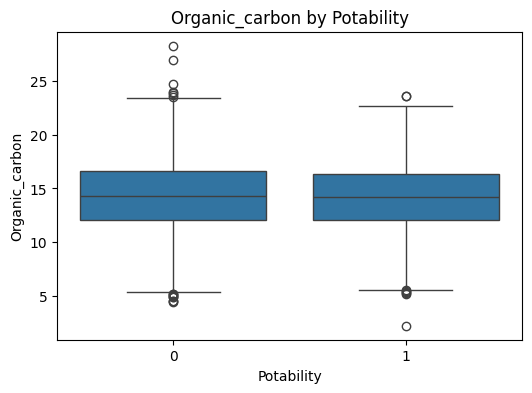

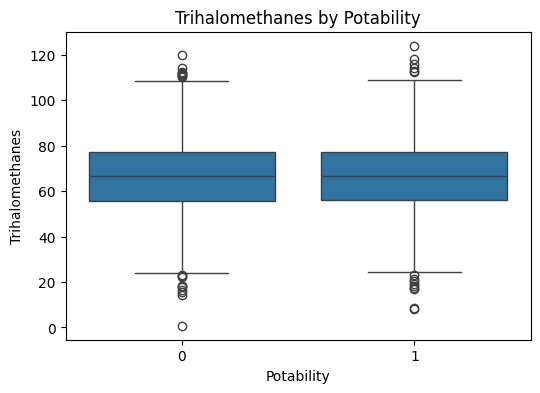

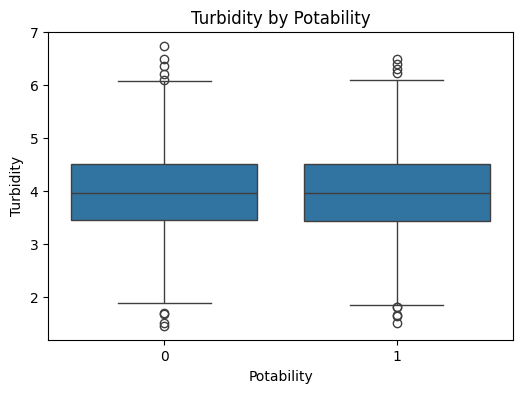

In [117]:
# Compare feature distributions based on Potability using boxplots

for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Potability', y=col, data=df)
    plt.title(f"{col} by Potability")
    plt.show()

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64


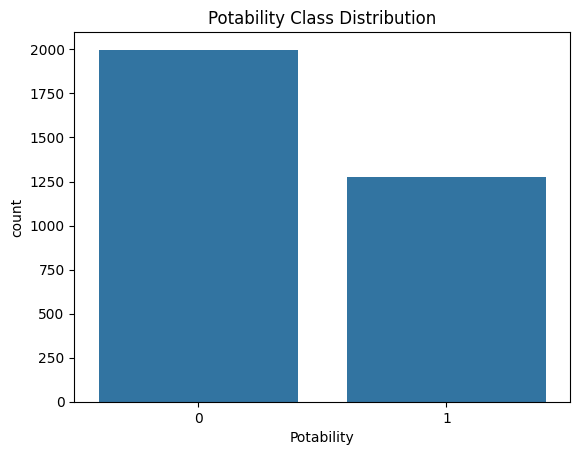

In [118]:
# Check the distribution of the target classes (Potability)
print(df['Potability'].value_counts(normalize=True))

# Visualize the class imbalance using a bar chart
sns.countplot(x='Potability', data=df)
plt.title("Potability Class Distribution")
plt.show()

In [119]:
# Check the skewness of each feature

df.drop(columns='Potability').skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

# 2. Data Preprocessing

## 2-1. handling missing values
Dropping rows with missing values would result in a 39% data loss, so I choose to impute instead.

In [120]:
df[df.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [121]:
df[df.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

Although the features have low skewness, using the median is preferred over the mean to avoid the influence of potential outliers.

For both Potability=0 and Potability=1, the medians are approximately equal, making median imputation a consistent and robust choice.

In [122]:
# List of columns with missing values
columns_with_nan = ['ph', 'Sulfate', 'Trihalomethanes']

# Fill missing values with the median of each respective column
for col in columns_with_nan:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [123]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## 2-2. handling outliers

In [124]:
from scipy.stats import zscore

# Compute the absolute z-score for each feature
features = df.columns[:-1]
z_scores = np.abs(zscore(df[features]))

# Identify outliers based on a threshold of z > 3
outlier_mask = (z_scores > 3)

print("Number of outliers based on Z-score (per column):")
print(pd.DataFrame(outlier_mask, columns=features).sum())

Number of outliers based on Z-score (per column):
ph                 28
Hardness           18
Solids             20
Chloramines        20
Sulfate            34
Conductivity        7
Organic_carbon      4
Trihalomethanes    18
Turbidity           9
dtype: int64


# 3. Modeling Strategies

In [125]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer, classification_report


In [130]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}


In [131]:
results = []

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=0)
    precision = precision_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred, pos_label=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    print(classification_report(y_test, y_pred, labels=[0, 1], digits=3))



===== Logistic Regression =====
              precision    recall  f1-score   support

           0      0.610     1.000     0.758       600
           1      0.000     0.000     0.000       383

    accuracy                          0.610       983
   macro avg      0.305     0.500     0.379       983
weighted avg      0.373     0.610     0.463       983


===== Random Forest =====


/Users/boohyemin/miniconda3/envs/mlops_ass1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/boohyemin/miniconda3/envs/mlops_ass1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/boohyemin/miniconda3/envs/mlops_ass1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0      0.665     0.920     0.772       600
           1      0.686     0.274     0.392       383

    accuracy                          0.668       983
   macro avg      0.676     0.597     0.582       983
weighted avg      0.673     0.668     0.624       983


===== KNN =====
              precision    recall  f1-score   support

           0      0.652     0.790     0.714       600
           1      0.508     0.339     0.407       383

    accuracy                          0.614       983
   macro avg      0.580     0.565     0.561       983
weighted avg      0.596     0.614     0.595       983


===== SVC =====
              precision    recall  f1-score   support

           0      0.671     0.933     0.781       600
           1      0.732     0.285     0.410       383

    accuracy                          0.681       983
   macro avg      0.702     0.609     0.595       983
weighted avg      0.695     0.681     0.

In [132]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Recall", ascending=False)
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.610376,0.610376,1.000000,0.758054
3,SVC,0.680570,0.671463,0.933333,0.781032
1,Random Forest,0.668362,0.665060,0.920000,0.772028
2,KNN,0.614446,0.651994,0.790000,0.714393


In [133]:
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}

In [134]:
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

results = []

param_grids = {
    "Random Forest": {
        "n_estimators": [10, 50, 100, 200],
        "max_features": [None, "sqrt", "log2"],
        "max_depth": [None, 5, 10]
    },
    "SVC": {
        "C": [1, 10],
        "gamma": ['scale', 0.1],
        "kernel": ["rbf", "linear"],
        "class_weight": ["balanced"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }
}

In [135]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scorer = make_scorer(f1_score, pos_label=0)

model_preds = {}

for name, model in models.items():
    print(f"\n===== {name} =====")

    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], scoring=scorer, cv=cv, n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_


    y_pred = best_model.predict(X_test_scaled)

    model_preds[name] = y_pred

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=0)
    precision = precision_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred, pos_label=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    print(classification_report(y_test, y_pred, labels=[0, 1], digits=3))


===== Random Forest =====
              precision    recall  f1-score   support

           0      0.655     0.952     0.776       600
           1      0.739     0.214     0.332       383

    accuracy                          0.664       983
   macro avg      0.697     0.583     0.554       983
weighted avg      0.688     0.664     0.603       983


===== KNN =====
              precision    recall  f1-score   support

           0      0.651     0.842     0.734       600
           1      0.541     0.292     0.380       383

    accuracy                          0.628       983
   macro avg      0.596     0.567     0.557       983
weighted avg      0.608     0.628     0.596       983


===== SVC =====
              precision    recall  f1-score   support

           0      0.698     0.705     0.701       600
           1      0.531     0.522     0.526       383

    accuracy                          0.634       983
   macro avg      0.614     0.614     0.614       983
weighted avg 

In [136]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Recall", ascending=False)
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.664293,0.654817,0.951667,0.775815
1,KNN,0.627670,0.650773,0.841667,0.734012
2,SVC,0.633774,0.698020,0.705000,0.701493


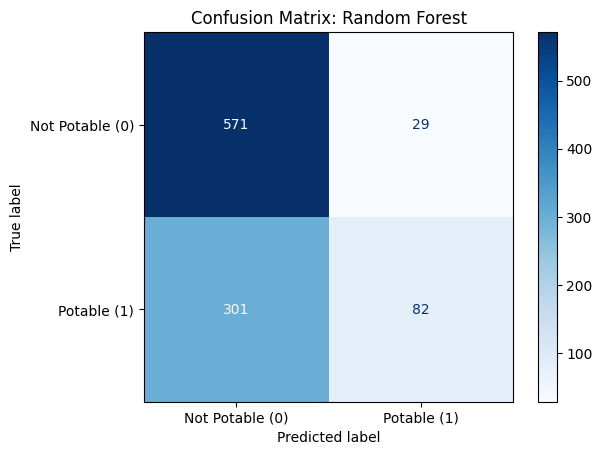

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_specific = model_preds["Random Forest"]

cm = confusion_matrix(y_test, y_pred_specific, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Potable (0)", "Potable (1)"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix: Random Forest")
plt.show()
